In [319]:
import scipy.stats as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
%matplotlib inline

What do I want to do? minimize wait time

In [114]:
nr_simulations = 10000
mins = range(0, 11)
obs = range(1, nr_simulations+1)

In [115]:
obs_list = []
mins_list = []
for i in obs:
    for m in mins:
        obs_list.append(i)
        mins_list.append(m)

In [116]:
len(obs_list)

110000

In [117]:
len(mins_list)

110000

In [118]:
mu = 1.6
poisson_valu_list = sc.poisson.rvs(mu, size=len(mins_list))

In [119]:
df = pd.DataFrame({'obs': obs_list, 'mins_since_last_tram': mins_list, 'poisson_value': poisson_valu_list})

In [120]:
df_cumsum = df.groupby(by=['obs','mins_since_last_tram']).sum().groupby(level=[0]).cumsum().reset_index()
df_cumsum = df_cumsum.rename(columns={'poisson_value': 'nr_people_cumsum_poisson_value'})

In [330]:
def get_expon_rv(current_min, input_scale):
    return sc.expon.rvs(scale=(input_scale - current_min))

In [333]:
df_cumsum['expected_wait_time_24_tram'] = df_cumsum.apply(lambda x: get_expon_rv(x['mins_since_last_tram'], 10), axis=1)
df_cumsum['expected_wait_time_24_tram_2'] = df_cumsum.apply(lambda x: get_expon_rv(x['mins_since_last_tram'], 20), axis=1)

In [125]:
df_cumsum['walk_time'] = 2.15

In [131]:
df_cumsum['mins_since_last_4_tram'] = np.random.randint(1, 8, size=len(mins_list))
df_cumsum['mins_since_last_14_tram'] = np.random.randint(1, 8, size=len(mins_list))

df_cumsum['expected_wait_time_4_tram'] = sc.expon.rvs(scale=(8- df_cumsum.mins_since_last_4_tram), size=len(mins_list))
df_cumsum['expected_wait_time_14_tram'] = sc.expon.rvs(scale=(8- df_cumsum.mins_since_last_14_tram), size=len(mins_list))




In [334]:
df_cumsum.head()

,obs,mins_since_last_tram,nr_people_cumsum_poisson_value,expected_wait_time_24_tram,walk_time,mins_since_last_4_tram,mins_since_last_14_tram,expected_wait_time_4_tram,expected_wait_time_14_tram,total_expected_wait_time_4_tram,total_expected_wait_time_14_tram,should_stay,prediction,expected_wait_time_from_walking,predicted_wait_time,always_stay__wait_time,always_walk__wait_time,predicted__wait_time,random_choice__wait_time,expected_wait_time_24_tram_2
0,1,0,1,2.939666,2.15,5,5,0.337822,4.491567,2.487822,6.641567,0,0,2.487822,2.487822,12.141588,2.487822,2.487822,12.141588,4.497557
1,1,1,3,6.733528,2.15,3,4,0.104964,6.929550,2.254964,9.079550,0,0,2.254964,2.254964,7.422058,2.254964,2.254964,7.422058,18.252127
2,1,2,6,1.567010,2.15,3,5,1.287764,3.812132,3.437764,5.962132,0,0,3.437764,3.437764,5.874118,3.437764,3.437764,5.874118,12.752228
3,1,3,7,1.334430,2.15,4,7,1.153092,0.529538,3.303092,2.679538,0,0,2.679538,2.679538,20.572917,2.679538,2.679538,2.679538,4.138723
4,1,4,9,2.530643,2.15,3,6,3.731966,4.915687,5.881966,7.065687,0,1,5.881966,14.704354,14.704354,5.881966,14.704354,5.881966,4.387351


In [133]:
df_cumsum['total_expected_wait_time_4_tram'] = df_cumsum.walk_time + df_cumsum.expected_wait_time_4_tram
df_cumsum['total_expected_wait_time_14_tram'] = df_cumsum.walk_time + df_cumsum.expected_wait_time_14_tram



In [337]:
x = np.array([1, 2, 3])

In [340]:
def take_min(a):
    if min(a) < 2:
        print(min(a))
        return 1
    else:
        return 0

In [341]:
take_min(x)

1


1

In [342]:
def should_stay(exp_4, exp_14, exp_24, exp_24_2):
    if min(exp_4, exp_14) > min(exp_24, exp_24_2):
        return 1
    else:
        return 0
#     if exp_4 > exp_24 and exp_14 > exp_24:
#         return 1
#     else:
#         return 0

df_cumsum['should_stay'] = df_cumsum.apply(lambda x: should_stay(x['total_expected_wait_time_4_tram'], x['total_expected_wait_time_14_tram'], x['expected_wait_time_24_tram'], x['expected_wait_time_24_tram_2']), axis=1)


# df['newcolumn'] = df.apply(lambda x: fxy(x['A'], x['B']), axis=1)


In [343]:
df_cumsum.head()

,obs,mins_since_last_tram,nr_people_cumsum_poisson_value,expected_wait_time_24_tram,walk_time,mins_since_last_4_tram,mins_since_last_14_tram,expected_wait_time_4_tram,expected_wait_time_14_tram,total_expected_wait_time_4_tram,total_expected_wait_time_14_tram,should_stay,prediction,expected_wait_time_from_walking,predicted_wait_time,always_stay__wait_time,always_walk__wait_time,predicted__wait_time,random_choice__wait_time,expected_wait_time_24_tram_2
0,1,0,1,2.939666,2.15,5,5,0.337822,4.491567,2.487822,6.641567,0,0,2.487822,2.487822,12.141588,2.487822,2.487822,12.141588,4.497557
1,1,1,3,6.733528,2.15,3,4,0.104964,6.929550,2.254964,9.079550,0,0,2.254964,2.254964,7.422058,2.254964,2.254964,7.422058,18.252127
2,1,2,6,1.567010,2.15,3,5,1.287764,3.812132,3.437764,5.962132,1,0,3.437764,3.437764,5.874118,3.437764,3.437764,5.874118,12.752228
3,1,3,7,1.334430,2.15,4,7,1.153092,0.529538,3.303092,2.679538,1,0,2.679538,2.679538,20.572917,2.679538,2.679538,2.679538,4.138723
4,1,4,9,2.530643,2.15,3,6,3.731966,4.915687,5.881966,7.065687,1,1,5.881966,14.704354,14.704354,5.881966,14.704354,5.881966,4.387351


/Users/will/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


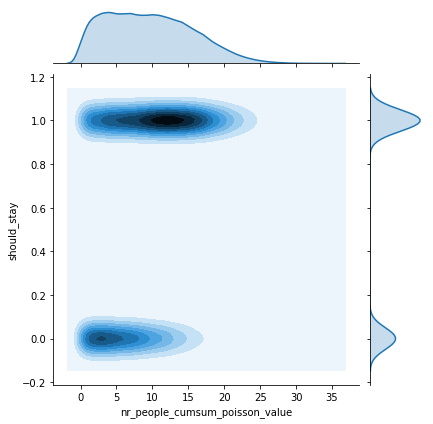

In [344]:
sns.jointplot(x="nr_people_cumsum_poisson_value", y="should_stay", data=df_cumsum, kind="kde");

In [18]:
# print(df_cumsum[df_cumsum['nr_people_cumsum_poisson_value'] == 4]['expected_wait_time_24_tram'].mean())
# sns.distplot(df_cumsum[df_cumsum['nr_people_cumsum_poisson_value'] == 4]['expected_wait_time_24_tram'])

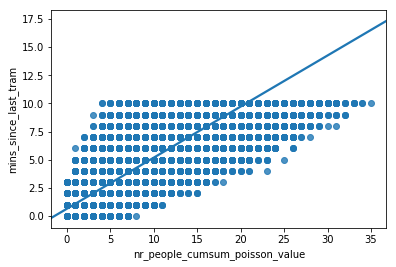

In [345]:
sns.regplot(x = df_cumsum.nr_people_cumsum_poisson_value, y= df_cumsum.mins_since_last_tram)

In [346]:
lr = LogisticRegression()

In [347]:
df_cumsum.nr_people_cumsum_poisson_value.shape

(110000,)

In [348]:
X = np.array(df_cumsum.nr_people_cumsum_poisson_value).reshape((len(mins_list),1))
y = np.array(df_cumsum.should_stay).reshape((len(mins_list),1))

In [349]:
model = lr.fit(X, y)

/Users/will/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/will/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [350]:
sum(model.predict(X))

83593

In [351]:
df_cumsum['prediction'] = model.predict(X)

In [360]:
def predicted_waiting_time(prediction, x, x1, y, z, random=False):
    if random == True:
        prediction = np.random.randint(0, 2)
    if prediction == 1:
        return min(x, x1)
    else:
        return min(y, z)



In [372]:
df_cumsum['predicted__wait_time'] = df_cumsum[['prediction','expected_wait_time_24_tram', 'expected_wait_time_24_tram_2', 'total_expected_wait_time_4_tram', 'total_expected_wait_time_14_tram']].apply(lambda x: predicted_waiting_time(x['prediction'],x['expected_wait_time_24_tram'], x['expected_wait_time_24_tram_2'] ,x['total_expected_wait_time_4_tram'], x['total_expected_wait_time_14_tram']), axis=1)
df_cumsum['always_walk__wait_time'] = df_cumsum[['total_expected_wait_time_4_tram', 'total_expected_wait_time_14_tram']].apply(lambda x: predicted_waiting_time(0,0, 0 ,x['total_expected_wait_time_4_tram'], x['total_expected_wait_time_14_tram']), axis=1)
df_cumsum['always_stay__wait_time'] = df_cumsum[['expected_wait_time_24_tram', 'expected_wait_time_24_tram_2']].apply(lambda x: predicted_waiting_time(1,x['expected_wait_time_24_tram'], x['expected_wait_time_24_tram_2'], 0, 0), axis=1)
df_cumsum['random_choice__wait_time'] = df_cumsum[['expected_wait_time_24_tram', 'total_expected_wait_time_4_tram', 'total_expected_wait_time_14_tram', 'expected_wait_time_24_tram_2']].apply(lambda x: predicted_waiting_time(0,x['expected_wait_time_24_tram'], x['expected_wait_time_24_tram_2'], x['total_expected_wait_time_4_tram'], x['total_expected_wait_time_14_tram'], random=True), axis=1)


In [373]:
df_cumsum.groupby('prediction').agg({'predicted_wait_time':np.mean})

,predicted_wait_time
prediction,
0,3.881859
1,3.207595


In [374]:
df_cumsum.agg({'predicted_wait_time':[np.mean, np.std], 'always_walk__wait_time': [np.mean, np.std], 'always_stay__wait_time': [np.mean,np.std], 'random_choice__wait_time': [np.mean, np.std]})

,predicted_wait_time,always_walk__wait_time,always_stay__wait_time,random_choice__wait_time
mean,3.369461,3.889940,3.567678,3.733614
std,3.590309,2.088916,4.569973,3.570337


In [375]:
list_of_cols= ['predicted_wait_time', 'always_walk__wait_time', 'always_stay__wait_time', 'random_choice__wait_time']

In [376]:
df_master = pd.DataFrame(columns=['item', 'wait_time'])


In [377]:
for col in list_of_cols:
    df = pd.DataFrame({'item': col, 'wait_time': df_cumsum[col]})
    df_master = pd.concat([df_master, df])

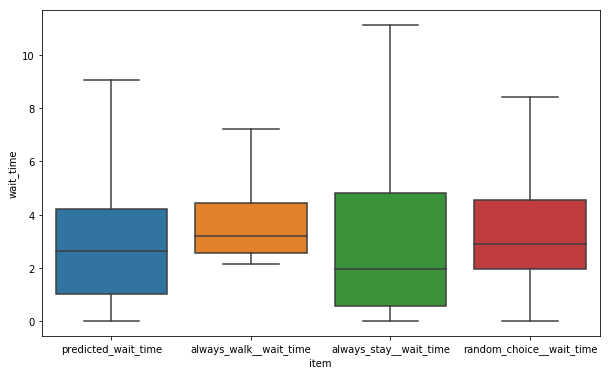

In [378]:
fig= plt.figure(figsize=(10,6))
sns.boxplot(x=df_master.item, y=df_master.wait_time, data=df_master, showfliers=False)

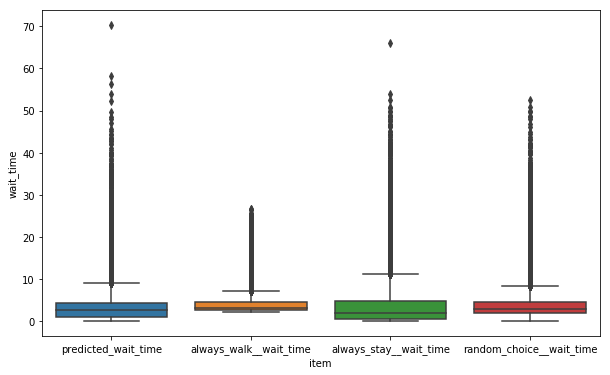

In [379]:
fig= plt.figure(figsize=(10,6))
sns.boxplot(x=df_master.item, y=df_master.wait_time, data=df_master, showfliers=True)